2023-12-12 18:32:32.820506: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 18:32:32.896078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 18:32:32.896133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 18:32:32.899175: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 18:32:32.912530: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 18:32:32.914084: I tensorflow/core/platform/cpu_feature_guard.cc:1

Тренировочный датасет MNIST с соревнования Kaggle:  (42000, 785)
       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0   

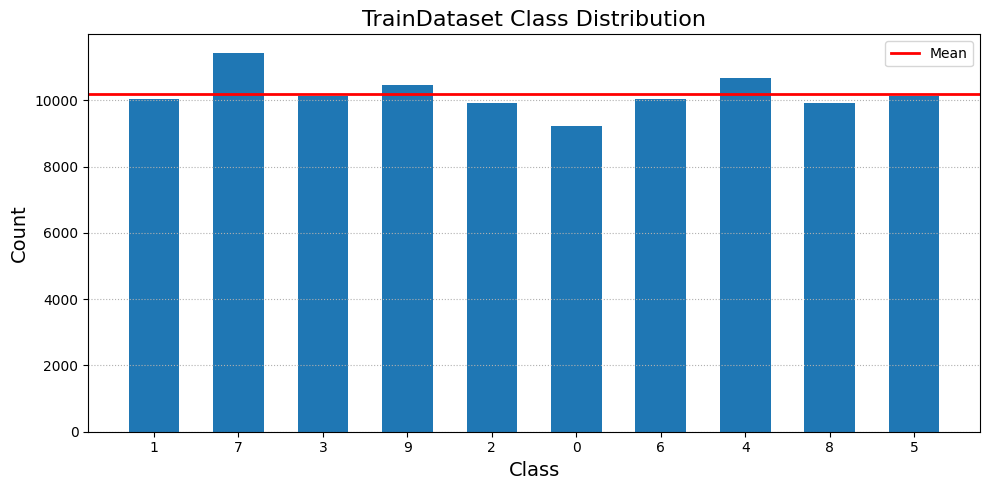


Правильные ответы:
 0         1
1         0
2         1
3         4
4         0
         ..
101995    8
101996    3
101997    5
101998    6
101999    8
Name: label, Length: 102000, dtype: int64

Правильные ответы в формате one hot encoding:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(102000, 28, 28, 1)


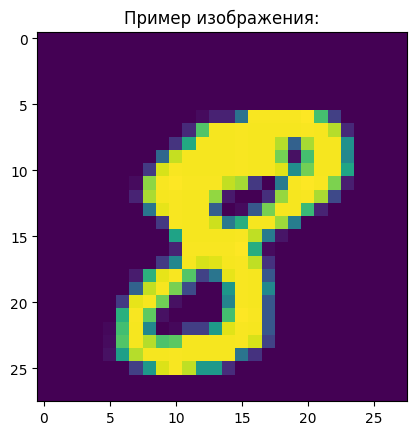


Данные готовы к построению модели.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/8


2023-12-12 18:32:53.012170: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 255897600 exceeds 10% of free system memory.


2550/2550 [==============================] - 10s 4ms/step - loss: 0.2503 - accuracy: 0.9276 - val_loss: 0.1190 - val_accuracy: 0.9656
Epoch 2/8
2550/2550 [==============================] - 9s 3ms/step - loss: 0.1131 - accuracy: 0.9665 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 3/8
2550/2550 [==============================] - 9s 3ms/step - loss: 0.0832 - accuracy: 0.9745 - val_loss: 0.0740 - val_accuracy: 0.9779
Epoch 4/8
2550/2550 [==============================] - 9s 3ms/step - loss: 0.0642 - accuracy: 0.9800 - val_loss: 0.0617 - val_accuracy: 0.9813
Epoch 5/8
2550/2550 [==============================] - 8s 3ms/step - loss: 0.0553 - accuracy: 0.9821 - val_loss: 0.0544 - val_accuracy: 0.9834
Epoch 6/8
2550/2550 [==============================] - 9s 3ms/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.0533 - val_accuracy: 0.9858
Epoch 7/8
2550/2550 [==============================] - 8s 3ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.0496 - val_accuracy: 0.9859
Epoch 8/

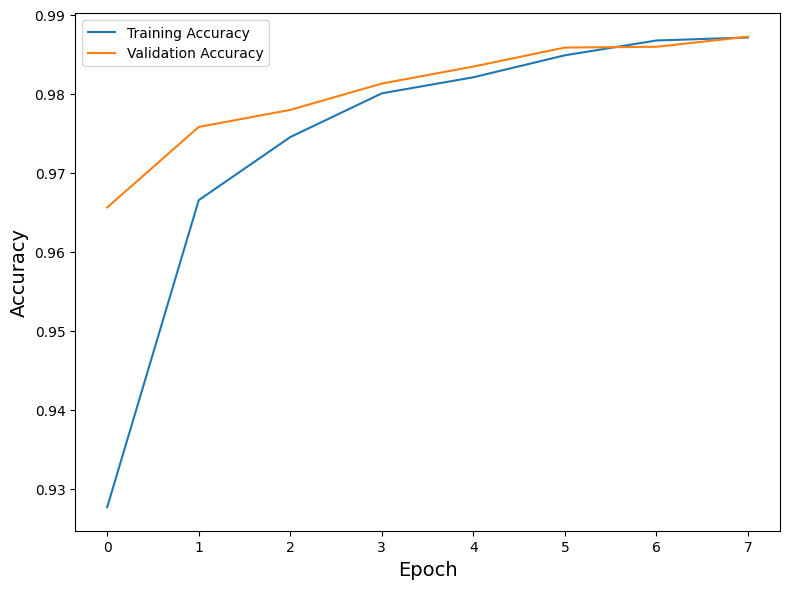

Проверка модели на тестовых данных:
313/313 - 1s - loss: 0.0361 - accuracy: 0.9886 - 522ms/epoch - 2ms/step
Esta pronto!


In [1]:
#  Практическое задание № 3. Создание нейросети. By A. Khodorov
# Выполнено на облачном сервере Reg.ru
# ОЗУ - 4Гб, Python - 3.10, tensorflow - 2.15 (12.12.23)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import tensorflow as tf

# Шаг 1. Загружаем данные и создаём DataFrame

# Тренировочный датасет MNIST с соревнования Kaggle

train_mnist_K = pd.read_csv('data/train.csv')
test_mnist_K = pd.read_csv('data/test.csv')
#sample_sub = pd.read_csv('data/sample_submission.csv') # Загружаем бланк ответов 
print('Тренировочный датасет MNIST с соревнования Kaggle: ', train_mnist_K.shape)
print(train_mnist_K)
print('\nТестовый датасет MNIST с соревнования Kaggle: ', test_mnist_K.shape)
print(test_mnist_K)

# Тренировочный/стардатный датасет MNIST

train_mnist = pd.read_csv('data/mnist_train.csv')
test_mnist = pd.read_csv('data/mnist_test.csv')
print('\nТренировочный датасет стардатного MNIST: ')
print(train_mnist)
print('\nТестовый датасет стардатного MNIST: ')
print(test_mnist)

'''
Чтобы нейронная сеть хорошо выявила признаки при обучении нужно сформировать больший датасет.
Для этого объединим обучающий набор из соревнования в Kaggle и обучающий / тестовый наборы из
стандартного датасета MNIST, который также расположен на Kaggle.
'''
# Объединяем датасеты

train_mnist_K.columns = train_mnist.columns
train_dataset = pd.concat([train_mnist_K,train_mnist], ignore_index=True)

print('\nОбъединённый тренировочный датасет:\n ')
print(train_dataset)
print(f"\nТренировочные данные содержат {train_dataset.shape[0]} записей и {train_dataset.shape[1]} признаков")
print(f"Тестовые данные содержат {test_mnist.shape[0]} записей и {test_mnist.shape[1]} признаков")
print(f"Количество пропущенных данных: {train_dataset.isnull().sum().sum()}")

labels = train_dataset.label.value_counts().index # Получаем названия классов
counts = train_dataset.label.value_counts() # Получаем количество строк по классам

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, width=0.6)
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel('Class', fontsize=14) # Добавляем текст на ось X
plt.ylabel('Count', fontsize=14) # Добавляем текст на ось Y
plt.title('TrainDataset Class Distribution', fontsize=16) # Добавляем заголовок об распределение классов

# Добавляем линию, чтобы показать равномерность распределения признаков
plt.axhline(counts.mean(), color='red', linewidth=2, label='Mean')
plt.legend()
plt.grid(axis='y', linestyle='dotted')
plt.tight_layout()
plt.show()

'''
1. В объединённом тренировочном датасете 102000 записей и 785 признаков. 
2. Отсутствуют пропущенные данные.
3. Признаки для классификации одинаковые для тренировочных и тестовых данных.
4. Все классы распределены +- равномерно. Больше всего - "7" и меньше всего - "0".
'''

# 2. Предобработка данных.

# Выделяем данные для обучения (без первого столбца с ответами)

x_train = train_dataset.drop('label', axis=1) # Оставляем чисто изображение
x_train = np.array(x_train)
x_test = test_mnist.drop('label', axis=1)
x_test = np.array(x_test)


# Выделяем правильные ответы
y_train = train_dataset['label']
print('\nПравильные ответы:\n', y_train)
y_train = np.array(y_train)

y_test = test_mnist['label']
y_test = np.array(y_test)

'''
 Ответы не разделены на 10 различных меток классов, а представлены в виде одного массива
со значениями классов. Преобразуем ответы в формат one hot encoding.
'''
y_train = np.eye(10)[y_train]
print('\nПравильные ответы в формате one hot encoding:\n', y_train[:4])
y_test = np.eye(10)[y_test]

'''
Наши изображения имеют глубину 1, но мы должны явно объявить это.
Другими словами, преобразуем наш набор данных из формы (n, ширина, высота) в (n, глубина, ширина, высота).
'''
# Изменяем размер данных обучающей и тестовой выборок (28x28x1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

plt.imshow(x_train[10])
plt.title("Пример изображения:")
plt.show()

# Нормализация данных для обучения и тестирования
x_train = x_train.astype('float32')
x_train /= 255.0
x_test = x_test.astype('float32')
x_test /= 255.0

print('\nДанные готовы к построению модели.')

# Построение модельной структуры

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

'''
Укажем какие слои будут присутствовать в нашей нейронной сети.
В tf.keras.models.Sequential() создаём линейное (или «последовательное») расположение слоев.

В tf.keras.layers.Flatten(input_shape=(28,28))создаём первый слой в нашей сети.
Каждое изображение имеет 28 * 28 = 784 значения и Flatten()создает слой с 784 узлами,
которые содержат значение каждого пикселя для данного изображения.

tf.keras.layers.Dense() создает то, что называется полностью связанным или плотно связанным (dense) слоем.
В нём 128 узлов с функцией активации ReLU.

Для предотвращения нашей нейронной сети от переоснащение, используем tf.keras.layers.Dropout(0.2), т.е. каждый
узел в первом Dense слое имеет вероятность 0,2 быть исключенным из расчета активации следующего слоя.

Выходной слой (tf.keras.layers.Dense(10, activation='softmax') имеет количество узлов, равное количеству классов,
которые наша модель пытается предсказать.Поскольку модель пытается предсказать 10 различных цифр, и поэтому последний
слой в модели имеет 10 узлов. На выходе для каждого узла конечного слоя будет вероятность того, что данное изображение
является конкретной цифрой. Функция активации для нег - softmax.

'''

print(model.summary())

# Зададим метод тренировки

loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

'''
Функция model.compile() вызывается по заранее построенной модели и определяет функция потерь, оптимизатор и метрики.

Оптимизатор «Адам» является широко используемым оптимизатором и прекрасно работает для задач как наша.

Используем функцию потерь для обучения - CategoricalCrossentropy, которая принимает вектор логитов
и индекс True и возвращает скалярную потерю для каждого примера. Эта ф-ция хороша для задач классификации мультикласса,
подобных нашей.

Последняя часть model.compile() - указывает метрики, которые она должна использовать при оценке модели.
'''

# Обучаем модель
history = model.fit(x_train, y_train, epochs=8, validation_split=0.2)
#print(accuracy)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

# Как видим, на 5 эпохе точность нашей модели составляет 0.9834 и при тестировании 0.9868, что выше чем
# 0.9754 и 0.9752 полученные такой же моделью, тренированной только на стардатном датасете MNIST

plt.xlabel('Epoch', fontsize=14) # Добавляем текст на ось X
plt.ylabel('Accuracy', fontsize=14) # Добавляем текст на ось Y

ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training Accuracy")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation Accuracy")
ax.legend()

plt.tight_layout()
plt.show()

# Оценка модели
print('Проверка модели на тестовых данных:')
model.evaluate(x_test, y_test, verbose=2)

print('Esta pronto!')
